Random Forest using Kaggle Animal Shelter Dataset
https://www.kaggle.com/c/shelter-animal-outcomes

In [1]:
import pandas as pd
import os
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [2]:
data_dir = '/Users/christopherallison/Documents/Coding/Data'

In [3]:
# Data cleanup
# TRAIN DATA
train_df = pd.read_csv(os.path.join(data_dir, 'shelter_train.csv'), header=0)        # Load the train file into a dataframe

In [4]:
train_df.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A690243,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [5]:
train_df.OutcomeType.unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object)

In [6]:
outcome = {}

for i, oc in enumerate(train_df.OutcomeType.unique()):
    outcome[oc] = i
    
train_df['OutcomeType'] = train_df.OutcomeType.map( outcome ).astype(int)

In [7]:
train_df.OutcomeSubtype.unique()

array([nan, 'Suffering', 'Foster', 'Partner', 'Offsite', 'SCRP',
       'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'In Kennel',
       'In Foster', 'Barn', 'Court/Investigation', 'Enroute', 'At Vet',
       'In Surgery'], dtype=object)

In [8]:
outcome_sub = {}
for i, st in enumerate(train_df.OutcomeSubtype.unique()):
    outcome_sub[st] = i

In [9]:
train_df['OutcomeSubtype'] = train_df.OutcomeSubtype.map( outcome_sub ).astype(int)

In [10]:
train_df.AnimalType.unique()

array(['Dog', 'Cat'], dtype=object)

In [11]:
train_df['AnimalType'] = train_df.AnimalType.map( {'Dog': 0, 'Cat': 1} ).astype(int)

In [12]:
train_df.SexuponOutcome.unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [13]:
sex_outcome = {}
for i, sex in enumerate(train_df.SexuponOutcome.unique()):
    sex_outcome[sex] = i

In [14]:
sex_outcome

{nan: 5,
 'Intact Male': 2,
 'Neutered Male': 0,
 'Unknown': 4,
 'Spayed Female': 1,
 'Intact Female': 3}

In [15]:
train_df['SexuponOutcome'] = train_df.SexuponOutcome.map( sex_outcome ).astype(int)

In [16]:
train_df.AgeuponOutcome.unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years', nan,
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [22]:
period_dict = {'year': 365, 'month': 30, 'week': 7, 'day': 1, 'day': 1}

def convert_age_to_days(age):
    try:
        number, period = str(age).split()
        period = period.rstrip("s")
        days = int(number) * period_dict[period]
        return int(days)
    except ValueError:
        return 30
    

In [23]:
train_df['AgeuponOutcome'] = train_df.AgeuponOutcome.apply(convert_age_to_days)

In [24]:
train_df.AgeuponOutcome[:10]

0    365
1    365
2    730
3     21
4    730
5     30
6     21
7     21
8    150
9    365
Name: AgeuponOutcome, dtype: int64

In [25]:
train_df.Breed.unique()

array(['Shetland Sheepdog Mix', 'Domestic Shorthair Mix', 'Pit Bull Mix',
       ..., 'Vizsla/Boxer', 'German Shepherd/Australian Kelpie',
       'Boxer/German Shepherd'], dtype=object)

In [26]:
# Could do something with a countvectorizer for Breed & Color, but we'll stick to simple here

In [27]:
breed = {}

for i, b in enumerate(train_df.Breed.unique()):
    breed[b] = i
    
train_df['Breed'] = train_df.Breed.map( breed ).astype(int)

In [28]:
train_df.Color.unique()[:10]

array(['Brown/White', 'Cream Tabby', 'Blue/White', 'Blue Cream', 'Tan',
       'Black/Tan', 'Blue Tabby', 'Brown Tabby', 'Red/White', 'White'], dtype=object)

In [29]:
color = {}

for i, c in enumerate(train_df.Color.unique()):
    color[c] = i
    
train_df['Color'] = train_df.Color.map( color ).astype(int)

In [30]:
# We could also do something very cool with text analysis for names, but we'll keep it simple and go length

train_df['Name'] = train_df.Name.apply(lambda x: len(str(x)))

In [31]:
train_df.interpolate().head() # could have used dropna().median()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,7,2014-02-12 18:22:00,0,0,0,0,365,0,0
1,A656520,5,2013-10-13 12:44:00,1,1,1,1,365,1,1
2,A686464,6,2015-01-31 12:28:00,2,2,0,0,730,2,2
3,A683430,3,2014-07-11 19:09:00,3,3,1,2,21,1,3
4,A667013,3,2013-11-15 12:52:00,3,3,0,0,730,3,4


In [32]:
# Save our clean dataframe to csv so we don't need to do this again.
train_df.to_csv(os.path.join(data_dir, "clean_train.csv"))

In [33]:
# Work out a test_train_split to see how we do
X = train_df.drop(['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'], axis=1)
X.dtypes

Name              int64
AnimalType        int64
SexuponOutcome    int64
AgeuponOutcome    int64
Breed             int64
Color             int64
dtype: object

In [34]:
X.AgeuponOutcome.replace('NA',0)

/Users/christopherallison/.virtualenvs/py_twi/lib/python3.4/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


0         365
1         365
2         730
3          21
4         730
5          30
6          21
7          21
8         150
9         365
10        730
11        730
12       1460
13        730
14        365
15         90
16         21
17         14
18        730
19        365
20         60
21        365
22        730
23        300
24         60
25         30
26        180
27       1825
28         60
29       2555
         ... 
26699     730
26700     300
26701     330
26702     730
26703    2190
26704      28
26705      60
26706      60
26707     365
26708     730
26709      30
26710      30
26711     365
26712    4380
26713    6570
26714      60
26715      60
26716      60
26717    3285
26718      60
26719     730
26720      60
26721    1825
26722     150
26723    2190
26724      30
26725      90
26726    1460
26727      28
26728     365
Name: AgeuponOutcome, dtype: int64

In [35]:
train_features = X.values
train_features[:10]

array([[  7,   0,   0, 365,   0,   0],
       [  5,   1,   1, 365,   1,   1],
       [  6,   0,   0, 730,   2,   2],
       [  3,   1,   2,  21,   1,   3],
       [  3,   0,   0, 730,   3,   4],
       [  4,   0,   3,  30,   4,   5],
       [  5,   1,   2,  21,   1,   6],
       [  3,   1,   4,  21,   1,   7],
       [  4,   0,   1, 150,   5,   8],
       [  3,   0,   1, 365,   6,   9]])

In [36]:
train_target = train_df['OutcomeType'].values
train_target

array([0, 1, 2, ..., 2, 3, 3])

In [37]:
# Set up our train_test_split

X_train, x_test, y_train, y_test = train_test_split(train_features,
                                          train_target,
                                          test_size=0.4,
                                          random_state=42)

In [38]:
# New we finally get to the classifier!

clf = RandomForestClassifier(n_estimators=100)

In [39]:
clf = clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9384548232213007'

In [40]:
clf.predict(x_test[0])

/Users/christopherallison/.virtualenvs/py_twi/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [41]:
def reverse_dict_search(d, target):
    for k, v in d.items():
        if v == target:
            return k

In [42]:
def predict_outcome(animal):
    
    animaltype = {'Dog': 0,'Cat': 1}
    
    name, animal_class, sex, age, animal_breed, animal_color = animal
    print("Name length:{}".format(name))
    print("Animal Type:{}".format(reverse_dict_search(animaltype, animal_class)))
    print("Sex:{}".format(reverse_dict_search(sex_outcome, sex)))
    print("Age:{} days".format(age))
    print("Breed:{}".format(reverse_dict_search(breed, animal_breed)))
    print("Color:{}".format(reverse_dict_search(color, animal_color)))
    print("************")
    print("Prediction: {}\n".format(reverse_dict_search(outcome, clf.predict(animal))))

In [43]:
predict_outcome(x_test[2])

Name length:3
Animal Type:Cat
Sex:Unknown
Age:240 days
Breed:Domestic Shorthair Mix
Color:Brown Tabby/White
************
Prediction: Transfer



/Users/christopherallison/.virtualenvs/py_twi/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [44]:
# Evaluate the model
print (X_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16037, 6) (16037,)
(10692, 6) (10692,)


In [45]:
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn import metrics
print ("Accuracy = %.2f" % (accuracy_score(y_test, y_predict)))

Accuracy = 0.60


In [46]:
model_score = clf.score(x_test, y_test)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print ("Confusion Matrix \n", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.60 

Confusion Matrix 
 [[ 716   68  784  346    3]
 [ 119  101   96  288    4]
 [ 540   28 3229  521    3]
 [ 374  147  874 2368   15]
 [   4    6    6   50    2]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 716 |  68 |
Actual   |-----|-----|
       1 | 119 | 101 |
         |-----|-----|


In [47]:
# Create confusion matrix for test data

categories = ['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died']

from sklearn.metrics import classification_report
print(classification_report(y_test, 
                            y_predict, 
                            target_names=categories))

                 precision    recall  f1-score   support

Return_to_owner       0.41      0.37      0.39      1917
     Euthanasia       0.29      0.17      0.21       608
       Adoption       0.65      0.75      0.69      4321
       Transfer       0.66      0.63      0.64      3778
           Died       0.07      0.03      0.04        68

    avg / total       0.59      0.60      0.59     10692



In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    # Simple plot based on the Iris sample CM
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Users/christopherallison/.virtualenvs/py_twi/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


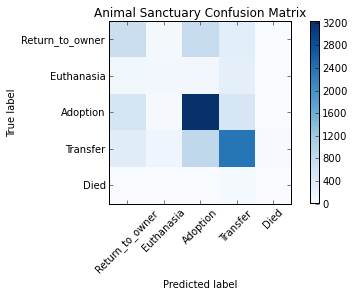

In [49]:
plot_confusion_matrix(confusion_matrix, categories, title="Animal Sanctuary Confusion Matrix")

In [ ]:
# Now we do the same thing with the real test data... but - it's in a different format, so we pass for now.

In [67]:
# TEST DATA
test_df = pd.read_csv(os.path.join(data_dir, 'shelter_test.csv'), header=0)        # Load the test file into a dataframe

In [68]:
test_df.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [ ]:
# Clean test_df

test_df['Name'] = test_df.Name.apply(lambda x: len(str(x)))

In [ ]:
test_df['AnimalType'] = test_df.AnimalType.map( {'Dog': 0, 'Cat': 1} ).astype(int)

In [ ]:
test_df['AgeuponOutcome'] = test_df.AgeuponOutcome.apply(convert_age_to_days)

In [72]:
test_df['SexuponOutcome'] = test_df.SexuponOutcome.map( sex_outcome ).astype(int)

ValueError: Cannot convert NA to integer

In [73]:
test_df['Breed'] = test_df.Breed.map( breed ).astype(int)

ValueError: Cannot convert NA to integer

In [ ]:
test_df['Color'] = test_df.Color.map( color ).astype(int)

In [74]:
test_df.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,1,2015-10-12 12:15:00,0,3,300,Labrador Retriever Mix,Red/White
1,2,1,2014-07-26 17:59:00,0,1,730,German Shepherd/Siberian Husky,Black/Tan
2,3,1,2016-01-13 12:20:00,1,0,365,Domestic Shorthair Mix,Brown Tabby
3,4,1,2013-12-28 18:12:00,0,2,120,Collie Smooth Mix,Tricolor
4,5,1,2015-09-24 17:59:00,0,0,730,Miniature Poodle Mix,White


In [ ]:
# The data is now ready to go. So lets fit to the train, then predict to the test!
# Convert back to a numpy array
train_data = train_df.values
test_data = test_df.values

In [ ]:
print 'Training...'
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit( train_data[0::,1::], train_data[0::,0] )

In [ ]:
print 'Predicting...'
output = forest.predict(test_data).astype(int)

In [ ]:
predictions_file = open("myfirstforest.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'